<br>
<h2 style = "font-size:40px; font-family:Garamond ; font-weight : normal; background-color: #263D42; color :#FFFFFF   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Credit Card Fraud Detection Project</h2>
<br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #263D42; color :#FFFFFF   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Table of Contents </h2>



1. [Overview](#1.0)

2. [Data Collection](#2.0)

3. [Data Cleaning](#3.0)

4. [EDA (Data Analysis and Preparation)](#4.0)

5. [Data Scaling and Distributing](#5.0)

6. [Modeling](#6.0)

7. [Results](#7.0)

8. [Conclusions](#8.0)

<a id = '1.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #263D42; color :#FFFFFF   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 1. Overview </h2>

### Problem Statement :
Credit card fraud is a form of **identity theft** that involves an unauthorized taking of another’s credit card information for the purpose of charging purchases to the account or removing funds from it. With the proliferation of e-commerce and the surge in OTT platforms amidst the Coronavirus Pandemic has led to a **significant increase** in credit card usage, alongside other payment methods.

However, credit card fraud has experienced a **notable increase** in incidents, indicating the binary essence of these occurrences. According to the reference provided, in addition to the relentless surge in fraud cases over recent years, global losses attributed to credit card fraud are projected to exceed **$43 billion by 2026**.

Consequently, addressing this problem has become imperative, leading to the emergence of numerous startups in the industry. Developing automated models utilizing **AI and Machine Learning** is now **crucial** in combating this growing challenge.

### Objective :
- Address class imbalance in the dataset and accurately classify credit card transactions as **fraudulent** or **genuine**.
- Employ two distinct Machine Learning hyperparameter tuning techniques, **Optuna** and **GridSearchCV**, utilizing similar hyperparameters. This approach aims to optimize the selected models and facilitate a comparative analysis of their efficacy.

### Attribute Information :

- **V1 - V28** : Principal components derived from PCA, represented numerically in this dataset.

- **Time** : Seconds elapsed between each transaction, from the first and last transaction.

- **Amount** : Transaction amount.

- **Class**: Indicates whether the transaction is fraudulent or genuine, represented by values of 1 or 0 respectively.

<a id = '2.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #263D42; color :#FFFFFF   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 2. Data Collection</h2>

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Additional settings
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.7f}'.format

# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading creditcard.csv data
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
# Get the top 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000000,-1.3598071,-0.0727812,2.5363467,1.3781552,-0.3383208,0.4623878,0.2395986,0.0986979,0.3637870,0.0907942,-0.5515995,-0.6178009,-0.9913898,-0.3111694,1.4681770,-0.4704005,0.2079712,0.0257906,0.4039930,0.2514121,-0.0183068,0.2778376,-0.1104739,0.0669281,0.1285394,-0.1891148,0.1335584,-0.0210531,149.6200000,0
1,0.0000000,1.1918571,0.2661507,0.1664801,0.4481541,0.0600176,-0.0823608,-0.0788030,0.0851017,-0.2554251,-0.1669744,1.6127267,1.0652353,0.4890950,-0.1437723,0.6355581,0.4639170,-0.1148047,-0.1833613,-0.1457830,-0.0690831,-0.2257752,-0.6386720,0.1012880,-0.3398465,0.1671704,0.1258945,-0.0089831,0.0147242,2.6900000,0
2,1.0000000,-1.3583541,-1.3401631,1.7732093,0.3797796,-0.5031981,1.8004994,0.7914610,0.2476758,-1.5146543,0.2076429,0.6245015,0.0660837,0.7172927,-0.1659459,2.3458649,-2.8900832,1.1099694,-0.1213593,-2.2618571,0.5249797,0.2479982,0.7716794,0.9094123,-0.6892810,-0.3276418,-0.1390966,-0.0553528,-0.0597518,378.6600000,0
3,1.0000000,-0.9662717,-0.1852260,1.7929933,-0.8632913,-0.0103089,1.2472032,0.2376089,0.3774359,-1.3870241,-0.0549519,-0.2264873,0.1782282,0.5077569,-0.2879237,-0.6314181,-1.0596472,-0.6840928,1.9657750,-1.2326220,-0.2080378,-0.1083005,0.0052736,-0.1903205,-1.1755753,0.6473760,-0.2219288,0.0627228,0.0614576,123.5000000,0
4,2.0000000,-1.1582331,0.8777368,1.5487178,0.4030339,-0.4071934,0.0959215,0.5929407,-0.2705327,0.8177393,0.7530744,-0.8228429,0.5381956,1.3458516,-1.1196698,0.1751211,-0.4514492,-0.2370332,-0.0381948,0.8034869,0.4085424,-0.0094307,0.7982785,-0.1374581,0.1412670,-0.2060096,0.5022922,0.2194222,0.2151531,69.9900000,0


In [ ]:
# Get the shape of the Data frame
df.shape

(284807, 31)

In [ ]:
# Check Data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<a id = '3.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #263D42; color :#FFFFFF   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 3. Data Cleaning </h2>

In [ ]:
# Check for missing values values in a data frame
df.isnull().sum().sum()

0

In [ ]:
# Check for duplicates in the data frame
df.duplicated().sum().sum()

1081

In [ ]:
# Delete duplicate rows
df.drop_duplicates(inplace=True)

# Recheck for duplicates in the data frame
df.duplicated().sum().sum()

0

<a id = '4.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #263D42; color :#FFFFFF   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 4. EDA (Data Analysis and Preparation) </h2>

In [ ]:
# Check the Target variable class balance
df['Class'].value_counts(normalize=True)

Class
0   0.9983329
1   0.0016671
Name: proportion, dtype: float64

**Note:** From the above output, it can be observed that there is a high class imbalance with the target variable "Class". Only a mere 0.17% of the variable consists of the value "1", indicating instances of "Fraud".
<br>
<br>

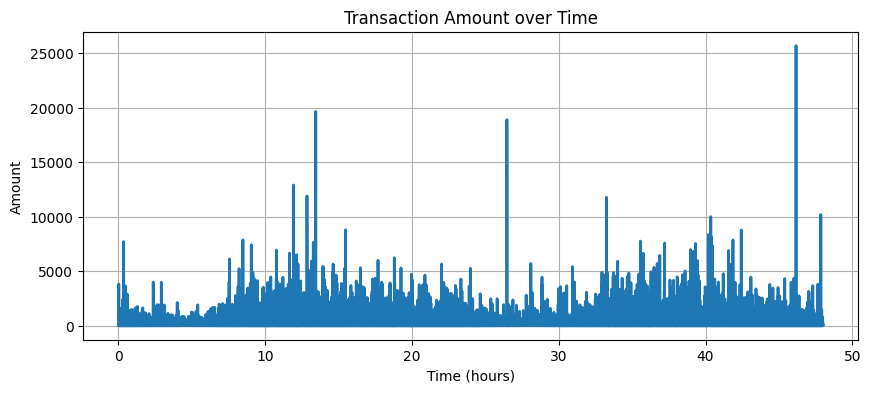

In [ ]:
# Convert 'Time' to hours for better visualization
df['TimeHours'] = df['Time'] / 3600

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(df['TimeHours'], df['Amount'], linewidth=2)
plt.title('Transaction Amount over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

In [ ]:
# Get the bottom 5 rows
df['TimeHours'].tail()

284802   47.9961111
284803   47.9963889
284804   47.9966667
284805   47.9966667
284806   47.9977778
Name: TimeHours, dtype: float64

**Note:** Based on the provided outputs, it's evident that the transactions data were collected over a period of approximately 48 hours
<br><br>

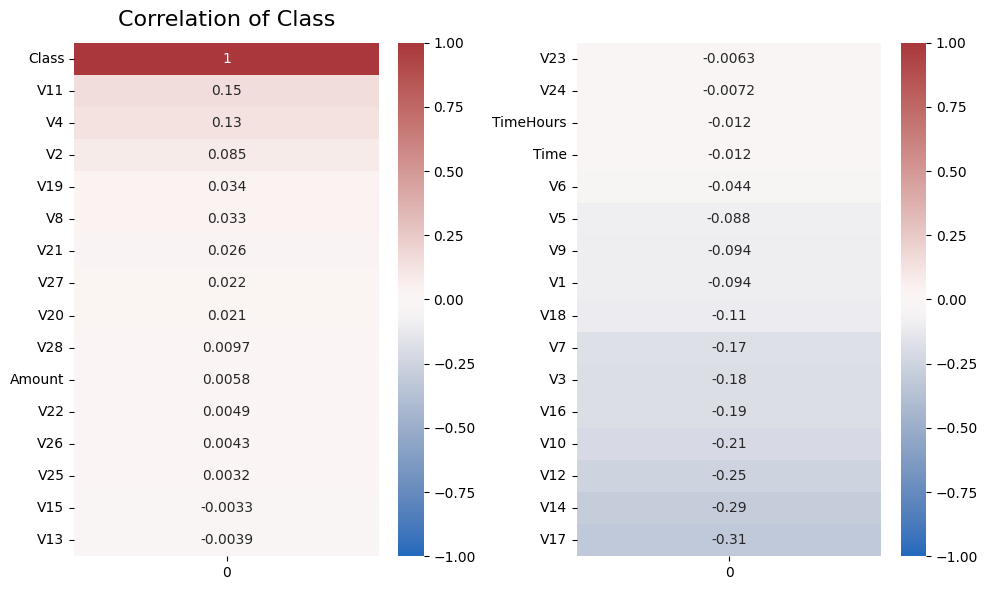

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corrwith(df['Class']).sort_values(ascending=False)

# Split correlation matrix into two halves
half_length = len(correlation_matrix) // 2
first_half = correlation_matrix[:half_length]
second_half = correlation_matrix[half_length:]

# Set up the plots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot the heatmap for the first half
heatmap1 = sns.heatmap(first_half.to_frame(), vmin=-1, vmax=1, annot=True, cmap='vlag', ax=axs[0])
heatmap1.set_title('Correlation of Class', fontdict={'fontsize': 16}, pad=12)

# Plot the heatmap for the second half
heatmap2 = sns.heatmap(second_half.to_frame(), vmin=-1, vmax=1, annot=True, cmap='vlag', ax=axs[1])

# Adjust layout
plt.tight_layout()
plt.show()

**Note**: In pursuit of optimizing the model, features with correlation values within the range of **[-0.1, 0.1]** will be excluded during feature selection.
<br><br>

In [ ]:
# Feature Selection
df_subset = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df_subset.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.5363467,1.3781552,0.2395986,0.0907942,-0.5515995,-0.6178009,-0.3111694,-0.4704005,0.2079712,0
1,0.1664801,0.4481541,-0.0788030,-0.1669744,1.6127267,1.0652353,-0.1437723,0.4639170,-0.1148047,0
2,1.7732093,0.3797796,0.7914610,0.2076429,0.6245015,0.0660837,-0.1659459,-2.8900832,1.1099694,0
3,1.7929933,-0.8632913,0.2376089,-0.0549519,-0.2264873,0.1782282,-0.2879237,-1.0596472,-0.6840928,0
4,1.5487178,0.4030339,0.5929407,0.7530744,-0.8228429,0.5381956,-1.1196698,-0.4514492,-0.2370332,0


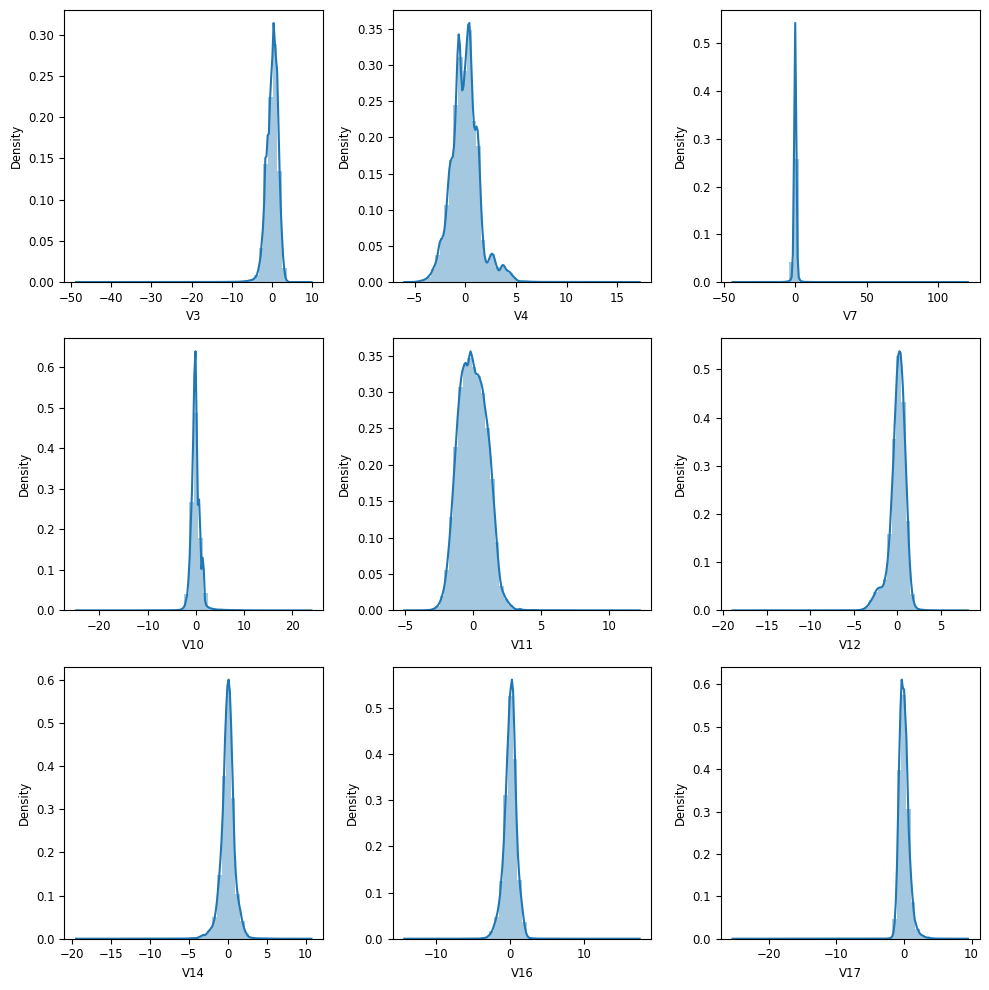

In [ ]:
# Define the number of rows and columns for subplots
num_rows, num_cols = 3, 3

# Create subplots with the specified number of rows and columns
f, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))

# Calculate and plot distribution of the variables
for index, column in enumerate(df_subset.columns[:-1]):  # Exclude the last column ('Class')
    i, j = (index // num_cols, index % num_cols)
    g = sns.distplot(df_subset[column], ax=axes[i, j])
    if g.legend_:
        g.legend_.remove()  # Remove the legend if present

    # Adjust font size of labels and ticks
    axes[i, j].set_xlabel(column, fontsize='small')
    axes[i, j].set_ylabel('Density', fontsize='small')
    axes[i, j].tick_params(axis='both', which='major', labelsize='small')

plt.tight_layout()
plt.show()

**Note**: Based on the generated plots, all independent variables exhibit a *Normal Distribution* pattern.
<br><br>

<a id = '5.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #263D42; color :#FFFFFF   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 5. Data Scaling and Distributing </h2>

In [ ]:
# Data Scaling and Manipulation libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

High class imbalance in a dataset, especially when dealing with situations like fraud detection, is crucial for model performance, potentially leading to **overfitting** and **wrong correlations** if not properly addressed.

This notebook employs undersampling and oversampling techniques to tackle the issue of class imbalance. Specifically, it utilizes the **Synthetic Minority Over-sampling Technique (SMOTE)** class for oversampling and the **RandomUnderSampler** class for undersampling.


In [ ]:
# Instantiate oversampling and undersampling techniques
random_state = 0
over = SMOTE(sampling_strategy = 0.5, random_state = random_state)
under = RandomUnderSampler(sampling_strategy = 0.1, random_state = random_state)

# Define features (X) and target variable (y)
X = df_subset.drop('Class', axis=1)
y = df_subset['Class']

# Define Pipeline steps and aplly the resampling
pipeline = Pipeline(steps=[
    ('under', under),
    ('over', over)
])

X, y = pipeline.fit_resample(X, y)

# Check for the Target variable new distribution
y.value_counts(normalize=True)

Class
0   0.6666667
1   0.3333333
Name: proportion, dtype: float64

<a id = '6.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #263D42; color :#FFFFFF   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 6. Modeling </h2>

Due to the high class imbalance, the chosen scoring metrics for the models are **AUC**, **AUPRC** and **f1 score**, providing a more nuanced evaluation of model performance in imbalanced datasets.

Additionally, the **average_precision_score** function in scikit-learn is utilized for calculating the AUPRC score due to the skewed distribution of the target variable, further explanation are available in the provided references.


In [ ]:
# Importing libraries for data splitting and model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score

# Importing libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# Importing libraries for hyperparameter optimization
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
from sklearn.model_selection import GridSearchCV

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Decision Tree Classifier using GridSearchCV**

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)

param_grid_dtc = {'max_depth': [None, 10, 100, 200, 300],
                  'min_samples_leaf': [1, 2, 10, 25, 50],
                  'min_samples_split': [2, 5, 10, 25, 50],
                  'max_features': ['sqrt', 0.5, None],
                  'criterion': ['gini', 'entropy']
                 }

dtc_cv = GridSearchCV(dtc, param_grid_dtc, scoring='average_precision', cv=5, n_jobs=-1)

In [ ]:
%%time
dtc_cv.fit(X_train, y_train)

CPU times: user 3.79 s, sys: 377 ms, total: 4.17 s
Wall time: 43.7 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 100, 200, 300],
                         'max_features': ['sqrt', 0.5, None],
                         'min_samples_leaf': [1, 2, 10, 25, 50],
                         'min_samples_split': [2, 5, 10, 25, 50]},
             scoring='average_precision')

In [ ]:
y_pred = dtc_cv.predict(X_test)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

auprc = average_precision_score(y_test, y_pred)
print("AUPRC Score:", auprc)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

ROC AUC Score: 0.9315004277690846
AUPRC Score: 0.8711614176730456
F1 Score: 0.914103923647932


### **Decision Tree Classifier using Optuna**

In [ ]:
def objective(trial):
    # Hyperparameters to be optimized
    max_depth = trial.suggest_int("max_depth", 2, 300)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 50)
    max_features = trial.suggest_categorical("max_features", [0.5, 'sqrt', None])
    criterion = trial.suggest_categorical("criterion", ['gini', 'entropy'])

    # Constructing DecisionTreeClassifier with sampled hyperparameters
    params = {
        "max_depth": max_depth,
        "min_samples_leaf": min_samples_leaf,
        "min_samples_split": min_samples_split,
        "max_features": max_features,
        "criterion": criterion
    }

    model = DecisionTreeClassifier(random_state=0, **params)

    # Cross-validation using average precision as scoring metric
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='average_precision', n_jobs=-1)
    return scores.mean()

In [ ]:
%%time
# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 5.99 s, sys: 461 ms, total: 6.45 s
Wall time: 9.68 s


In [ ]:
dtc_optuna = DecisionTreeClassifier(random_state=0, **study.best_params)
dtc_optuna.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_leaf=31,
                       min_samples_split=49, random_state=0)

In [ ]:
y_pred = dtc_optuna.predict(X_test)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

auprc = average_precision_score(y_test, y_pred)
print("AUPRC Score:", auprc)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

ROC AUC Score: 0.9319802827265514
AUPRC Score: 0.8684947772144626
F1 Score: 0.9135021097046414


### **Random Forest Classifier using GridSearchCV**

In [ ]:
rfr = RandomForestClassifier(random_state=0)

In [ ]:
param_grid_rfr = {
    'n_estimators': [100, 250, 300],
    'max_features': ['sqrt', 0.5],
    'max_depth': [5, 15, 30],
    'min_samples_split': [2, 5, 15],
    'min_samples_leaf': [2, 3, 4]
}

In [ ]:
rfr_cv = GridSearchCV(rfr, param_grid_rfr, cv=5, scoring='average_precision', n_jobs=-1)

In [ ]:
%%time
rfr_cv.fit(X_train, y_train)

CPU times: user 7.68 s, sys: 887 ms, total: 8.57 s
Wall time: 11min 23s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 15, 30],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 5, 15],
                         'n_estimators': [100, 250, 300]},
             scoring='average_precision')

In [ ]:
y_pred = rfr_cv.predict(X_test)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

auprc = average_precision_score(y_test, y_pred)
print("AUPRC Score:", auprc)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

ROC AUC Score: 0.9630046234523847
AUPRC Score: 0.9416934127766441
F1 Score: 0.9583778014941302


### **Random Forest Classifier using Optuna**

In [ ]:
def objective(trial):
    # Hyperparameters to be optimized
    n_estimators = trial.suggest_int("n_estimators", low=100, high=300, step=50)
    max_features = trial.suggest_categorical("max_features", [0.5, 'sqrt'])
    max_depth = trial.suggest_int("max_depth", low=5, high=30)
    min_samples_split = trial.suggest_int("min_samples_split", low=2, high=15)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", low=1, high=4)

    # Constructing RandomForestClassifier with sampled hyperparameters
    params = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf
    }

    model = RandomForestClassifier(random_state=0, **params)

    # Cross-validation using average precision as scoring metric
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='average_precision', n_jobs=-1)
    return scores.mean()

In [ ]:
%%time
# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 8.71 s, sys: 1.49 s, total: 10.2 s
Wall time: 7min 7s


In [ ]:
rfc_optuna = RandomForestClassifier(random_state=0, **study.best_params)
rfc_optuna.fit(X_train, y_train)

RandomForestClassifier(max_depth=23, n_estimators=300, random_state=0)

In [ ]:
y_pred = rfc_optuna.predict(X_test)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

auprc = average_precision_score(y_test, y_pred)
print("AUPRC Score:", auprc)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

ROC AUC Score: 0.9692416296893909
AUPRC Score: 0.9499361941222406
F1 Score: 0.9650053022269353


### **Support Vector Classification (SVC) using GridSearchCV**

In [ ]:
svc = SVC(random_state=0)

In [ ]:
param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly','sigmoid']
}

In [ ]:
svc_cv = GridSearchCV(svc, param_grid_svc, cv=5, scoring='average_precision', n_jobs=-1)

In [ ]:
%%time
svc_cv.fit(X_train, y_train)

CPU times: user 1.14 s, sys: 160 ms, total: 1.3 s
Wall time: 1min 49s


GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='average_precision')

In [ ]:
y_pred = svc_cv.predict(X_test)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

auprc = average_precision_score(y_test, y_pred)
print("AUPRC Score:", auprc)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

ROC AUC Score: 0.9695353053562009
AUPRC Score: 0.9291950866483843
F1 Score: 0.957688338493292


### **Support Vector Classification (SVC) using Optuna**

In [ ]:
def objective(trial):
    # Hyperparameters to be optimized
    C = trial.suggest_float("C", 0.01, 100)
    gamma = trial.suggest_categorical("gamma", ['scale', 'auto'])
    kernel = trial.suggest_categorical("kernel", ['linear', 'poly', 'rbf', 'sigmoid'])

    # Constructing SVC with sampled hyperparameters
    params = {
             "C": C,
             "gamma": gamma,
             "kernel": kernel,
    }

    model = SVC(random_state=0, **params)

    # Cross-validation using average precision as scoring metric
    score = cross_val_score(model, X_train, y_train, scoring='average_precision', cv=5)
    return score.mean()

In [ ]:
%%time
# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 10min 20s, sys: 621 ms, total: 10min 20s
Wall time: 2min 41s


In [ ]:
svc_optuna = SVC(random_state=0, **study.best_params)
svc_optuna.fit(X_train, y_train)

SVC(C=4.471797379956382, gamma='auto', random_state=0)

In [ ]:
y_pred = svc_optuna.predict(X_test)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

auprc = average_precision_score(y_test, y_pred)
print("AUPRC Score:", auprc)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

ROC AUC Score: 0.9602063930422139
AUPRC Score: 0.9192703255630753
F1 Score: 0.9487983281086729


### **KNeighborsClassifier (KNN) using GridSearchCV**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
# Define the grid of hyperparameters for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': range(1, 31),
    'leaf_size': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

In [ ]:
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5, scoring='average_precision', n_jobs=-1)

In [ ]:
%%time
knn_cv.fit(X_train, y_train)

CPU times: user 44.8 s, sys: 4.73 s, total: 49.5 s
Wall time: 15min 15s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(1, 31),
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='average_precision')

In [ ]:
y_pred = knn_cv.predict(X_test)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

auprc = average_precision_score(y_test, y_pred)
print("AUPRC Score:", auprc)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

ROC AUC Score: 0.9597531351262695
AUPRC Score: 0.9247123795424332
F1 Score: 0.9504741833508957


### **KNeighborsClassifier (KNN) using Optuna**

In [ ]:
def objective(trial):
    # Hyperparameters to be optimized
    n_neighbors = trial.suggest_int("n_neighbors", 1, 31)
    leaf_size = trial.suggest_int("leaf_size", 1, 31)
    weights = trial.suggest_categorical("weights", ['uniform', 'distance'])
    metric = trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski'])

    # Constructing KNeighborsClassifier with sampled hyperparameters
    params = {
             "n_neighbors": n_neighbors,
             "leaf_size": leaf_size,
             "weights": weights,
             "metric": metric,
             }

    model = KNeighborsClassifier(**params)

    # Cross-validation using average precision as scoring metric
    score = cross_val_score(model, X_train, y_train, scoring='average_precision', cv=5)
    return score.mean()

In [ ]:
%%time
# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 54.9 s, sys: 658 ms, total: 55.6 s
Wall time: 16.7 s


In [ ]:
knn_optuna = KNeighborsClassifier( **study.best_params)
knn_optuna.random_state = 0
knn_optuna.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=27, metric='euclidean', n_neighbors=19,
                     weights='distance')

In [ ]:
y_pred = knn_optuna.predict(X_test)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

auprc = average_precision_score(y_test, y_pred)
print("AUPRC Score:", auprc)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

ROC AUC Score: 0.9597531351262695
AUPRC Score: 0.9247123795424332
F1 Score: 0.9504741833508957


<a id = '7.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #263D42; color :#FFFFFF   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 7. Results </h2>

### ML Models Results Table :


|No.|ML Algorithm|ROC AUC|AUPRC|f1 Score|CPU / Wall time (s)|
|-|-|-|-|-|-|
|1|Decision Tree Classifier GridSearchCV|93.15%|87.12%|91.41%|<div style="text-align: center;">3.2 / 22.7</div>|
|2|Decision Tree Classifier Optuna|93.20%|86.84%|91.35%|<div style="text-align: center;">4.9 / 4.2</div>|
|3|Random Forest Classifier GridSearchCV|96.30%|94.17%|95.83%|<div style="text-align: center;">7.1 / 680</div>|
|4|Random Forest Classifier Optuna|96.55%|94.38%|96.07%|<div style="text-align: center;">8.9 / 474</div>|
|5|Support Vector Classification GridSearchCV|96.95%|92.92%|95.77%|<div style="text-align: center;">0.83 / 42.1</div>|
|6|Support Vector Classification Optuna|96.02%|91.93%|94.88%|<div style="text-align: center;">726 / 131</div>|
|7|K-Nearest Neighbors GridSearchCV|95.97%|92.47%|95.05%|<div style="text-align: center;">41.8 / 285</div>|
|8|K-Nearest Neighbors Optuna|95.97%|92.47%|95.05%|<div style="text-align: center;">36 / 9.4</div>|

**Note**: The CPU/Wall time results displayed above were collected during the initial testing conducted by the user.

<a id = '8.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #263D42; color :#FFFFFF   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 8. Conclusions </h2>


### Decision Tree Classifier :
- DTC models perform **slightly less** compared to other models but still show respectable performance.

### Random Forest Classifier :
- Both **GridSearchCV** and **Optuna** generally **outperform other models** in terms of all performance metrics.
- RFC have **moderate** computational requirements but provide **superior performance**.

### Support Vector Classification (SVC) :
- Also **performs well**, especially with **GridSearchCV**, having competitive scores across all metrics.
- SVC with **Optuna** hyperparameter tuning has a considerably **higher CPU time** compared to other models, indicating potential computational inefficiencies with this configuration.

  
### K-Nearest Neighbors (KNN) :
- KNN models **perform well** but are slightly behind Random Forest and SVC models.
- The choice between KNN models tuned with **GridSearchCV** and **Optuna** doesn't significantly affect performance, but **Optuna provides lower CPU/Wall time** for KNN, suggesting it as a preferable choice due to its efficiency.

---
<br>

- **Optuna** tends to perform **better in terms of computational efficiency**, as indicated by the **lower CPU/Wall time** compared to **GridSearchCV** in most cases.
- However, in the case of Support Vector Classification (SVC), **GridSearchCV** achieves **better performance metrics** with much lower computational time compared to **Optuna**. This occurrence warrants further investigation for a more comprehensive understanding.
- Expanding the analysis to datasets featuring **continuous target variables** is recommended to deepen insights into hyperparameter tuning methods. Utilizing regression models for training purposes offers a nuanced exploration of performance disparities between **Optuna** and **GridSearchCV** methodologies.
<br><br>